In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
# Reading the tips dataset from seaborn library
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## AIM

To predict the tip paid by customers in the restaurant

Target Feature = tip

Input Features = total_bill, sex, smoker, day, time, size

In [21]:
# Checking basic information about the input and output variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


numerical_columns = ['total_bill']

categorical_columns = ['sex', 'smoker', 'day', 'time', 'size']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
# Checking missing values

df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no missing values in the dataset

In [24]:
# Checking duplicate values

df.duplicated().sum()

1

In [25]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

There is only 1 duplicate value in the dataset

In [26]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [27]:
# Dropping the duplicate row at index 202

df = df.drop(index= 202)


In [28]:
df.duplicated().sum()

0

Removed the duplicated row and checked if it has been properly dropped

In [29]:
# Segregating numerical and categorical columns

numerical_columns = df.columns[(df.dtypes != 'category') & (df.dtypes != 'object')]
categorical_columns = df.columns[(df.dtypes == 'category') | (df.dtypes == 'object')]

print(f'Numerical Columns: {numerical_columns}')
print(f'Categorical Columns: {categorical_columns}')

Numerical Columns: Index(['total_bill', 'tip', 'size'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'day', 'time'], dtype='object')


In [30]:
# Descriptive statistics of numerical data

df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [31]:
# Descriptiove statistics of categorical data

df[categorical_columns].describe()

,sex,smoker,day,time
count,243,243,243,243
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


Of the categorical columns, sex, smoker, and time have 2 unique values while day has 4 unique values.
All the categorical features seem to be nomimal features and hence OneHotEncoding should be used.

/n


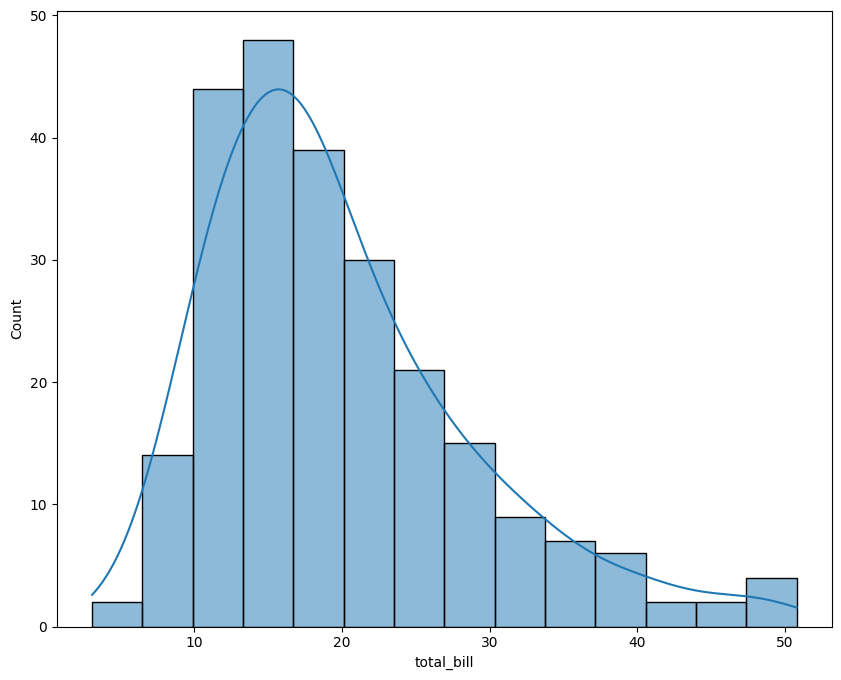

/n


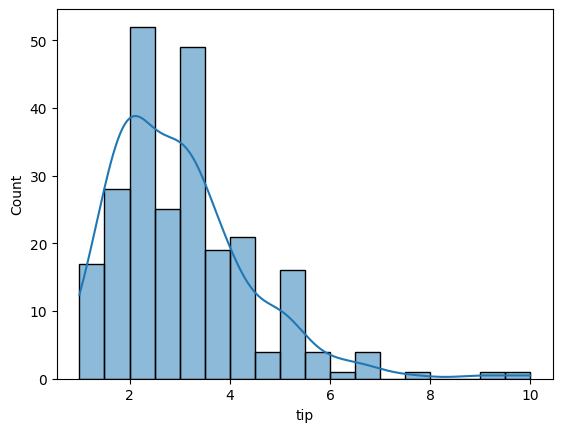

/n


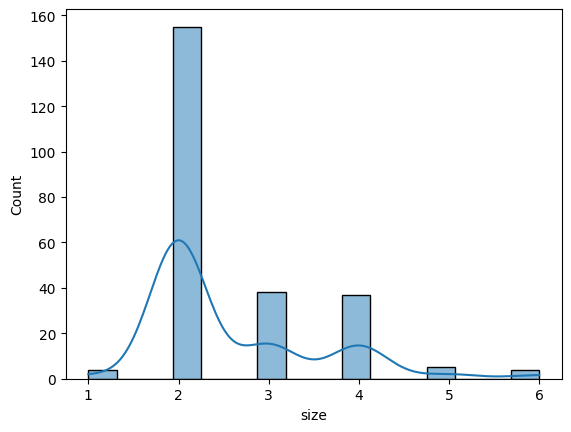

In [32]:
# Visualizing numerical values

plt.figure(figsize= (10,8))

for col in numerical_columns:
    sns.histplot(data=df, x=col, kde= True)
    print('/n')
    plt.show()

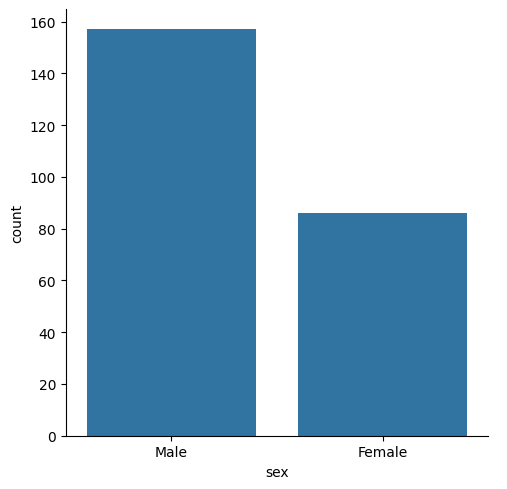

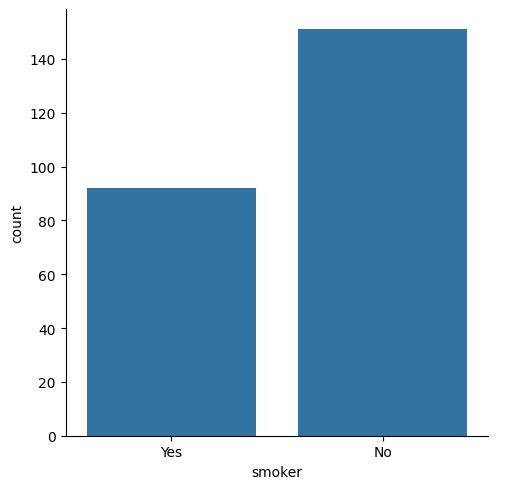

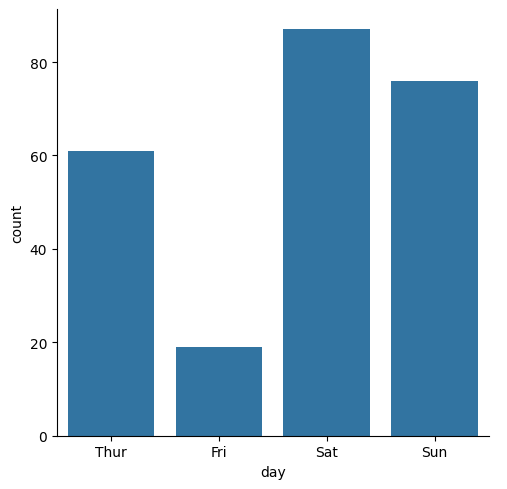

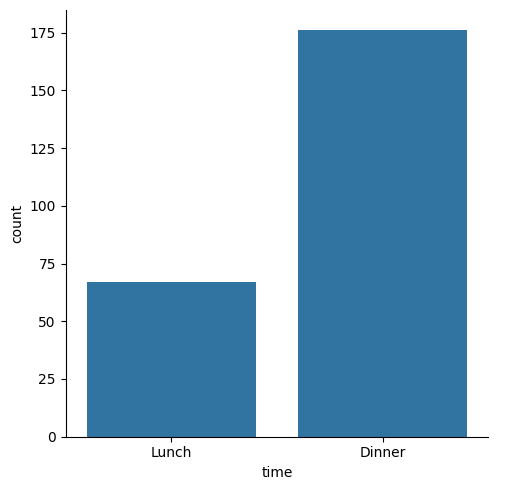

In [33]:
# Visualising categorical columns

for col in categorical_columns:
    sns.catplot(data=df, x=col, kind= 'count')
    plt.show()

<Axes: >

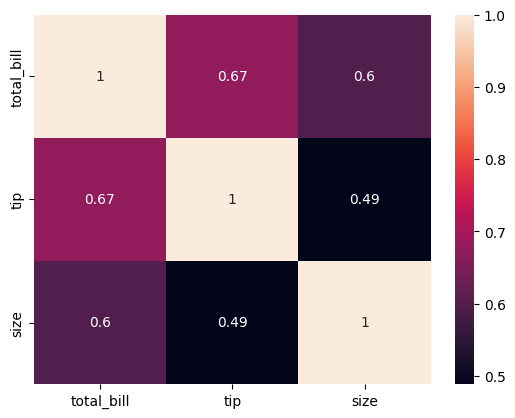

In [34]:
# Correlation between numerical values

sns.heatmap(data=df[numerical_columns].corr(), annot= True)

None of the features have a strong correlation with the target and we also do not see much of multi-collineralrut. Therefore, we should not drop any of the features while model training as all of them can have an impact.

In [37]:
df.to_csv('data/tips.csv', index= False, header= True)

In [36]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\HP\Desktop\Projects\Tips\notebooks
